In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#Description of function
#A device that can chop or blend food you feed into it

In [3]:
appliancestensor = pd.read_csv('appliances_and_toys_adjacencymatrix_V2.csv', header=[0,1], index_col=0) 
appliancestensor = appliancestensor.stack(0)
appliancestensor = appliancestensor.unstack(0)
df = pd.concat([appliancestensor.stack(0).loc["WestBend Food Processor",:], appliancestensor.stack(0).loc["WestBend Food Processor",:].T], sort=True).fillna(0).sort_index()

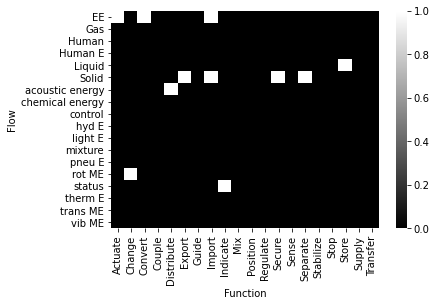

In [4]:
#Heatmap visual
sns.heatmap(appliancestensor.stack(0).loc["WestBend Food Processor",:], vmin=0, vmax=1, cmap="gray")

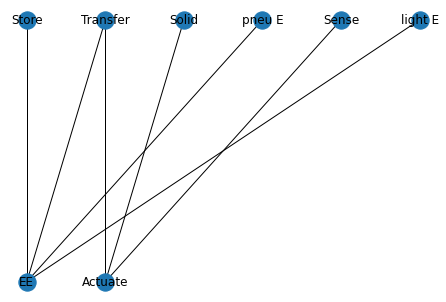

In [5]:
#Bipartite network visual (labels are messed up)
import scipy
g = nx.algorithms.bipartite.matrix.from_biadjacency_matrix(scipy.sparse.csc_matrix(appliancestensor.stack(0).loc["WestBend Food Processor",:]))
mapping = dict(zip(g, df.columns.values)) 
g = nx.relabel_nodes(g, mapping)
components = sorted(nx.connected_components(g), key=len, reverse=True)
largest_component = components[0]
C = g.subgraph(largest_component)
X, Y = nx.algorithms.bipartite.sets(C)
pos = dict()
pos.update( (n, (i, 2)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (i, 1)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(C, pos=pos, with_labels=True)
plt.show()